In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 버스 정류장 데이터 전처리
#### + 버스 노선 데이터와 병합

In [4]:
bus_line = pd.read_csv('../data/버스데이터/버스노선정보_구추가.csv',encoding = 'utf-8')
bus_line

,Unnamed: 0,노선ID,노선명,순번,구간ID,정류소ID,ARS-ID,정류소명,X좌표,Y좌표,구
0,0,100100124,0017,1,0,102000271,3689,청암자이아파트,126.946517,37.534363,용산구
1,1,100100124,0017,2,102700549,102000204,3298,청암동강변삼성아파트,126.949304,37.533961,용산구
2,2,100100124,0017,3,102700550,102000227,3321,청심경로당,126.950449,37.533744,용산구
3,3,100100124,0017,4,102700551,102000210,3304,원효2동주민센터,126.950904,37.534278,용산구
4,4,100100124,0017,5,102700552,102000212,3306,산천동,126.953984,37.535420,용산구
5,5,100100124,0017,6,102700553,102000214,3308,신창동세방아파트,126.955032,37.535749,용산구
6,6,100100124,0017,7,102700554,102000216,3310,남이장군사당,126.957957,37.536707,용산구
7,7,100100124,0017,8,102700555,102000218,3312,새마을금고,126.959503,37.537126,용산구
8,8,100100124,0017,9,102700779,102000153,3247,용문시장,126.960735,37.536630,용산구
9,9,100100124,0017,10,102700557,102000156,3250,용산전자상가입구,126.962043,37.534483,용산구


In [5]:
bus_line_jongno = bus_line.loc[bus_line.구=='종로구',['노선명','순번','ARS-ID','정류소명','X좌표','Y좌표','구']]
bus_line_jongno.노선명.unique()

array(['100', '101', '1014', '102', '1020', '103', '104', '105', '106',
       '107', '108', '109', '110A고려대', '110B국민대', '140', '142', '143',
       '144', '150', '151', '152', '153', '160', '162', '171', '1711',
       '172', '173', '201', '2014', '2112', '2233', '260', '261', '262',
       '270', '271', '272', '273', '301', '370', '401', '402', '406',
       '420', '421', '470', '501', '600', '6002', '6005', '601', '6011',
       '602', '606', '6702', '700', '701', '7016', '7018', '7019', '7021',
       '7022', '7025', '702A서오릉', '702B용두초교', '704', '705', '707', '708',
       '710', '720', '721', '7211', '7212', '741', '752', '7730', '9401',
       '9403', '9701', '9703', '9709', '9714', 'N13', 'N15', 'N16', 'N26',
       'N30', 'N37', 'N62', '서대문08', '서대문11', '종로01', '종로02', '종로03',
       '종로05', '종로06', '종로07', '종로08', '종로09', '종로11', '종로12', '종로13'],
      dtype=object)

In [6]:
bus_line_nowon = bus_line.loc[bus_line.구=='노원구',['노선명','순번','ARS-ID','정류소명','X좌표','Y좌표','구']]
bus_line_nowon.노선명.unique()

array(['100', '1017', '102', '103', '105', '1120', '1122', '1129', '1130',
       '1131', '1132', '1133', '1135', '1136', '1137', '1138', '1139',
       '1140', '1141', '1142', '1143', '1144', '1154', '1155', '1156',
       '1167', '1221', '1222', '1224', '1227', '146', '147', '172', '173',
       '202', '2113', '2114', '261', '6011', '6100', '6101', 'N13', 'N61',
       '노원01', '노원02', '노원03', '노원04', '노원05', '노원08', '노원09', '노원11',
       '노원13', '노원14', '노원15', '도봉09', '성북14-1'], dtype=object)

### 노원구 버스 데이터 : 마을, 지선버스만 추출

In [7]:
# 마을버스
bus_nowon = bus_line_nowon.loc[bus_line_nowon.노선명.isin(['노원01', '노원02', '노원03', '노원04', '노원05', '노원08', '노원09', '노원11','노원13', '노원14', '노원15']),:]
bus_list = ['100', '1017', '102', '103', '105', '1120', '1122', '1129', '1130',
       '1131', '1132', '1133', '1135', '1136', '1137', '1138', '1139',
       '1140', '1141', '1142', '1143', '1144', '1154', '1155', '1156',
       '1167', '1221', '1222', '1224', '1227', '146', '147', '172', '173',
       '202', '2113', '2114', '261', '6011', '6100', '6101', 'N13', 'N61','도봉09', '성북14-1']

green = []
for li in bus_list:
    if len(li)==4:
        green.append(li)
# 지선버스
bus_nowon2 = bus_line_nowon.loc[bus_line_nowon.노선명.isin(green),:]

In [8]:
bus_nowon

,노선명,순번,ARS-ID,정류소명,X좌표,Y좌표,구
34509,노원01,1,11577,보람사거리,127.067094,37.664367,노원구
34510,노원01,2,11531,계상초등학교,127.069051,37.662815,노원구
34511,노원01,3,11926,24시편의점,127.070720,37.661440,노원구
34512,노원01,4,11515,상계역,127.073501,37.660741,노원구
34513,노원01,5,11521,상계3동파출소,127.075068,37.663827,노원구
34514,노원01,6,11527,오뚜기슈퍼,127.072777,37.664391,노원구
34515,노원01,7,11534,또또슈퍼,127.071613,37.665313,노원구
34516,노원01,8,11539,대동택시,127.070855,37.665896,노원구
34517,노원01,9,11545,럭키수퍼,127.069527,37.666594,노원구
34518,노원01,10,11552,한신1차아파트후문,127.069180,37.665912,노원구


In [9]:
bus_nowon2

,노선명,순번,ARS-ID,정류소명,X좌표,Y좌표,구
344,1017,1,11482,삼화상운차고지,127.052922,37.626070,노원구
345,1017,2,11331,인덕삼거리,127.057411,37.628515,노원구
346,1017,3,11332,신도브래뉴.한전노원변전소,127.059124,37.628191,노원구
347,1017,4,11336,월계삼거리,127.060135,37.622992,노원구
348,1017,5,11335,광운대학교,127.058205,37.619818,노원구
349,1017,6,11334,광운전자공업고등학교,127.056659,37.618866,노원구
350,1017,7,11465,벼루말교,127.055224,37.619853,노원구
405,1017,62,11468,벼루말교,127.055280,37.619724,노원구
406,1017,63,11333,광운중학교,127.056333,37.618977,노원구
407,1017,64,11285,광운대학교,127.058676,37.620390,노원구


In [10]:
# 노원구 지선버스 노선명 데이터프레임
l = []
for i in green:
    l.append(bus_nowon2.loc[bus_nowon2.노선명==i, '정류소명'])

line = []

for i in range(0, len(green)):
    try:
        if list(l[i])[0] not in line:
            line.append(list(l[i])[0])
        else:
            line.append(list(l[i])[1])
    except:
        line.append(list(l[i])[0])

x = []
for li in line:
    a = bus_nowon2[bus_nowon2['정류소명']==li]['X좌표']
    x.append(a[a.index[0]])
y = []
for li in line:
    a = bus_nowon2[bus_nowon2['정류소명']==li]['Y좌표']
    y.append(a[a.index[0]])

nowon_green = pd.DataFrame({'노선명':green,'정류소명':line,'X좌표':x,'Y좌표':y})
nowon_green

,노선명,정류소명,X좌표,Y좌표
0,1017,삼화상운차고지,127.052922,37.626070
1,1120,한성여객종점,127.070007,37.638117
2,1122,예수사랑교회,127.087009,37.622275
3,1129,상계현대2차아파트,127.050954,37.671719
4,1130,청백아파트1단지,127.052252,37.635368
5,1131,중계본동종점,127.083081,37.644609
6,1132,월계동진아교통,127.064376,37.628128
7,1133,염광고등학교,127.050298,37.627227
8,1135,월계삼호4차아파트,127.065889,37.626511
9,1136,월계삼호4차아파트,127.065889,37.626511


In [11]:
# 노원구 마을버스 노선 정류장 좌표
nowon_points = []
for bus in bus_nowon.노선명.unique():
    exec("%s = []" %bus)
    for n in bus_nowon.loc[bus_nowon.노선명==bus].index:
        exec("%s.append([bus_nowon['Y좌표'][n],bus_nowon['X좌표'][n]])" %bus)
    exec("nowon_points.append(%s)" %bus)
# nowon_points

In [12]:
# 노원구 지선버스 노선 정류장 좌표
bus_nowon2.loc[bus_nowon2.노선명=='성북14-1','노선명'] = '성북14_1'

nowon_points2 = []
for bus in bus_nowon2.노선명.unique():
    bbus = "b_" + bus
    exec("%s = []" %bbus)
    for n in bus_nowon2.loc[bus_nowon2.노선명==bus].index:
        exec("%s.append([bus_nowon2['Y좌표'][n],bus_nowon2['X좌표'][n]])" %bbus)
    exec("nowon_points2.append(%s)" %bbus)
# nowon_points2

C:\Users\yumincho\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 종로구 버스 데이터 : 마을, 지선버스만 추출

In [13]:
# 마을버스
bus_jongno = bus_line_jongno.loc[bus_line_jongno.노선명.isin(['종로01', '종로02', '종로03',
       '종로05', '종로06', '종로07', '종로08', '종로09', '종로11', '종로12', '종로13']),:]

bus_list = ['100', '101', '1014', '102', '1020', '103', '104', '105', '106',
       '107', '108', '109', '110A고려대', '110B국민대', '140', '142', '143',
       '144', '150', '151', '152', '153', '160', '162', '171', '1711',
       '172', '173', '201', '2014', '2112', '2233', '260', '261', '262',
       '270', '271', '272', '273', '301', '370', '401', '402', '406',
       '420', '421', '470', '501', '600', '6002', '6005', '601', '6011',
       '602', '606', '6702', '700', '701', '7016', '7018', '7019', '7021',
       '7022', '7025', '702A서오릉', '702B용두초교', '704', '705', '707', '708',
       '710', '720', '721', '7211', '7212', '741', '752', '7730', '9401',
       '9403', '9701', '9703', '9709', '9714', 'N13', 'N15', 'N16', 'N26',
       'N30', 'N37', 'N62', '서대문08', '서대문11']
green = []
for li in bus_list:
    if len(li)==4:
        green.append(li)
# 지선버스
bus_jongno2 = bus_line_jongno.loc[bus_line_jongno.노선명.isin(green),:]

In [14]:
# 종로구 지선버스 노선명 데이터프레임
l = []
for i in green:
    l.append(bus_jongno2.loc[bus_jongno2.노선명==i, '정류소명'])

line = []

for i in range(0, len(green)):
    try:
        if list(l[i])[0] not in line:
            line.append(list(l[i])[0])
        else:
            line.append(list(l[i])[1])
    except:
        line.append(list(l[i])[0])

x = []
for li in line:
    a = bus_jongno2[bus_jongno2['정류소명']==li]['X좌표']
    x.append(a[a.index[0]])
y = []
for li in line:
    a = bus_jongno2[bus_jongno2['정류소명']==li]['Y좌표']
    y.append(a[a.index[0]])

jonglo_green = pd.DataFrame({'노선명':green,'정류소명':line,'X좌표':x,'Y좌표':y})
jonglo_green

,노선명,정류소명,X좌표,Y좌표
0,1014,신설동로타리,127.022947,37.575856
1,1020,롯데아파트,126.976490,37.610392
2,1711,일성아파트,126.972938,37.608801
3,2014,종로5가,127.002067,37.570556
4,2112,동묘앞,127.017841,37.573685
5,2233,동대문(흥인지문),127.012493,37.572167
6,6002,서대문역사거리,126.966527,37.565593
7,6005,인사동.아벤트리호텔,126.983034,37.573028
8,6011,명륜3가.성대입구,126.998290,37.582709
9,6702,JW메리어트동대문호텔,127.009484,37.570303


In [15]:
# 종로구 마을버스 노선 정류장 좌표
jongno_points = []
for bus in bus_jongno.노선명.unique():
    exec("%s = []" %bus)
    for n in bus_jongno.loc[bus_jongno.노선명==bus].index:
        exec("%s.append([bus_jongno['Y좌표'][n],bus_jongno['X좌표'][n]])" %bus)
    exec("jongno_points.append(%s)" %bus)
# jongno_points

In [16]:
# 종로구 지선버스 노선 정류장 좌표
jongno_points2 = []
for bus in bus_jongno2.노선명.unique():
    bbus = "b_" + bus
    exec("%s = []" %bbus)
    for n in bus_jongno2.loc[bus_jongno2.노선명==bus].index:
        exec("%s.append([bus_jongno2['Y좌표'][n],bus_jongno2['X좌표'][n]])" %bbus)
    exec("jongno_points2.append(%s)" %bbus)
jongno_points2

[[[37.5758561421, 127.0229468784],
  [37.5736846482, 127.017840741],
  [37.5741819196, 127.0156640117],
  [37.5787517073, 127.0152404443]],
 [[37.610392332800004, 126.97649036840001],
  [37.6088011743, 126.972938181],
  [37.6066085153, 126.9695657901],
  [37.6052849029, 126.96607156430001],
  [37.604323661399995, 126.96355709040002],
  [37.6024879601, 126.96128359379999],
  [37.5997667554, 126.9583524446],
  [37.5982689981, 126.9618276217],
  [37.5955802677, 126.9637111581],
  [37.592874, 126.964027],
  [37.5921935787, 126.9671282401],
  [37.5879008533, 126.97259443889999],
  [37.5851124767, 126.97104371350001],
  [37.583273476900004, 126.97034652290002],
  [37.580331734699996, 126.9711088601],
  [37.5768887748, 126.97229221149999],
  [37.5757714873, 126.9787904859],
  [37.5746126493, 126.98278367700001],
  [37.5724880557, 126.98289447719999],
  [37.5702649981, 126.9804546746],
  [37.572404504699996, 126.9772022826],
  [37.5776406417, 126.9721843535],
  [37.5804892941, 126.971244042000

# 미세먼지 데이터 확인 및 시각화

In [70]:
# 노원구 미세먼지 데이터
month_nowon = pd.read_csv('../data/환경기상데이터/month_nowon.csv',encoding='euc-kr')
month_nowon = pd.DataFrame(month_nowon[-3:].sum()[1:])
month_nowon.columns = ['pm10']
month_nowon = month_nowon.sort_values('pm10',ascending=False)
month_nowon

,pm10
중계본동,52
중계1동,52
월계1동,51
상계34동,45
상계9동,44
상계5동,44
중계4동,44
공릉1동,19
상계2동,16
중계23동,15


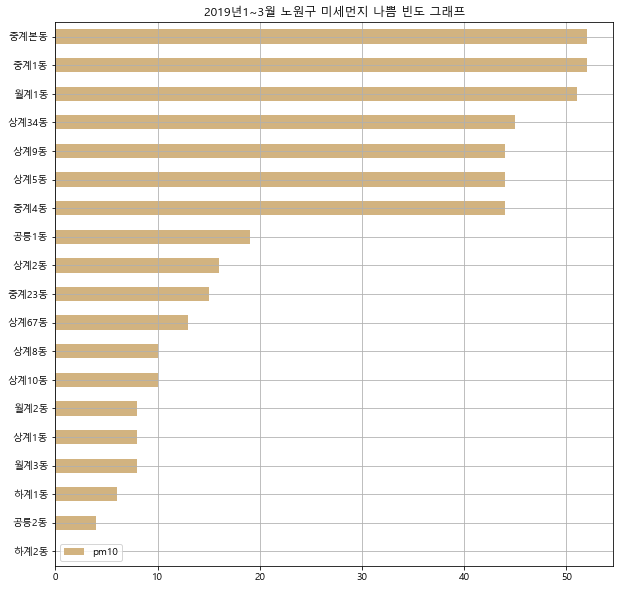

In [39]:
month_nowon.sort_values('pm10').plot(kind='barh',grid=True,figsize=(10,10),color='#D2B380')
plt.title('2019년1~3월 노원구 미세먼지 나쁨 빈도 그래프')
plt.show()
# #D2B380
# #CC9966

In [71]:
# 종로구 미세먼지 데이터
month_jongno = pd.read_csv('../data/환경기상데이터/month_jongno.csv',encoding='euc-kr')
month_jongno = pd.DataFrame(month_jongno[-3:].sum()[1:])
month_jongno.columns = ['pm10']
month_jongno = month_jongno.sort_values('pm10',ascending=False)
month_jongno.index

Index(['숭인2동', '숭인1동', '창신3동', '혜화동', '이화동', '사직동', '부암동', '종로56가동', '창신2동',
       '창신1동', '평창동', '청운효자동', '교남동', '가회동', '삼청동', '종로1234가동', '무악동'],
      dtype='object')

Text(0.5, 1.0, '2019년1~3월 종로구 미세먼지 나쁨 빈도 그래프')

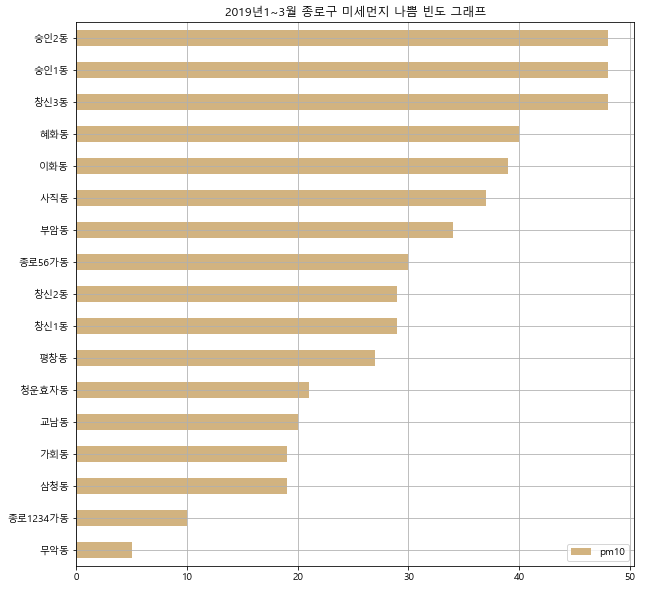

In [41]:
month_jongno.sort_values('pm10').plot(kind='barh',grid=True,figsize=(10,10),color='#D2B380')
plt.title('2019년1~3월 종로구 미세먼지 나쁨 빈도 그래프')

# 노약자 유동인구 데이터 확인

In [67]:
flow_nowon = pd.read_csv('../data/유동인구/nowon_flow_final.csv',encoding='euc-kr')
flow_nowon.set_index('Dong',inplace=True)
flow_nowon

,old_sum,sum,비율
Dong,,,
공릉1동,59007.702111,178226.670000,0.331082
공릉2동,72680.222889,185024.182556,0.392815
상계10동,15258.834111,44731.661333,0.341119
상계1동,39282.824556,120779.300222,0.325245
상계2동,33185.403111,90170.240111,0.368031
상계34동,20455.105556,55654.006111,0.367541
상계5동,12667.493000,35750.925111,0.354326
상계67동,60293.236444,191031.688556,0.315619
상계8동,20790.987556,70406.650333,0.295299


In [68]:
flow_jongno = pd.read_csv('../data/유동인구/jonglo_flow_final.csv',encoding='euc-kr')
flow_jongno.set_index('Dong',inplace=True)
flow_jongno

,old_sum,sum,비율
Dong,,,
가회동,7414.917778,24445.741724,0.303321
교남동,11734.775556,37376.372759,0.313962
무악동,8256.653000,25254.259123,0.326941
부암동,21385.108222,70060.316140,0.305239
사직동,52791.321333,182147.205965,0.289828
삼청동,10543.453556,34493.246667,0.305667
숭인1동,9782.526111,26372.627069,0.370935
숭인2동,37001.858667,98394.238621,0.376057
이화동,32480.857889,100437.431724,0.323394


# 시각화 함수

In [32]:
import json
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import random
import folium

In [33]:
# 선택한 데이터의 특정 필드로 choropleth 함수
def base_map(geo_path,data,field,col):
    geo_str = json.load(open(geo_path,encoding='utf-8'))
    map.choropleth(geo_data=geo_str,
                  data = data[field],
                  columns=[data.index,data[field]],
                  fill_color=col, key_on='feature.properties.name')   

# 버스 정류장 표시 함수
def bus_station(bus_data,base_map,col):
    for n in bus_data.index:
#         folium.Marker([bus_data['Y좌표'][n],bus_data['X좌표'][n]], 
#                   popup=bus_data['정류소명'][n], icon=folium.Icon(color='blue')).add_to(base_map)
                    folium.CircleMarker([bus_data['Y좌표'][n],bus_data['X좌표'][n]], 
                                        radius=10,color=col,filcolor=col,fill=True,popup=bus_data['정류소명'][n]).add_to(base_map)                              


# 색깔별로 버스 노선 및 노선명 표시 함수
def color_bus_line(bus_data,points,order,base_map):
    # random.seed(10276)
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(bus_data.노선명.unique()))]
    n=0
    for i in points:
        folium.PolyLine(i,color=color[n],weight=4, opacity=0.8).add_to(base_map)
        n += 1
    start = bus_data.loc[bus_data.순번==order,:]
    for n in start.index:
        folium.Marker([start['Y좌표'][n],start['X좌표'][n]], 
                  popup=start['노선명'][n], icon=folium.Icon(color='orange')).add_to(base_map)

def color_bus_line2(bus_data,points,green,base_map):
    # random.seed(10276)
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(bus_data.노선명.unique()))]
    n=0
    for i in points:
        folium.PolyLine(i,color=color[n],weight=4, opacity=0.8).add_to(base_map)
        n += 1
    start = green
    for n in start.index:
        folium.Marker([start['Y좌표'][n],start['X좌표'][n]], 
                  popup=start['노선명'][n], icon=folium.Icon(color='green')).add_to(base_map)

## 노원구 시각화

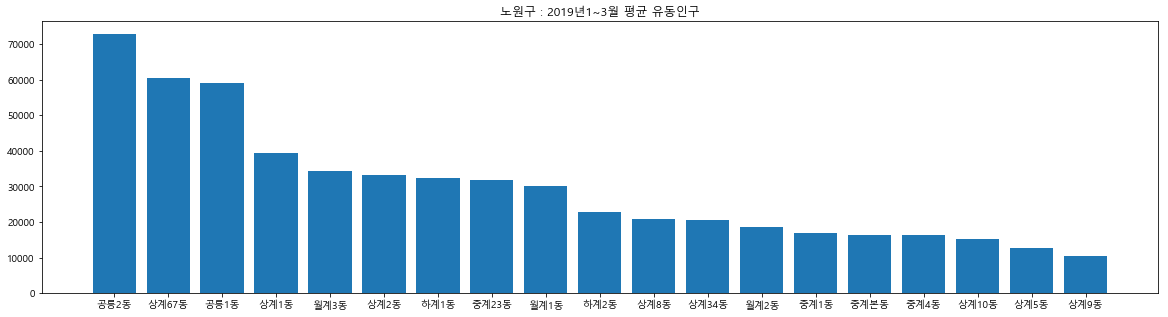

In [34]:
# 노원구 유동인구 그래프
flow_nowon_top = flow_nowon.sort_values('old_sum',ascending=False)
plt.figure(figsize=(20,5))
plt.title('노원구 : 2019년1~3월 평균 유동인구')
plt.bar(flow_nowon_top.index,flow_nowon_top['old_sum'])
plt.show()

In [35]:
bus_nowon.loc[bus_nowon.순번==5,:].sort_values('정류소명')

,노선명,순번,ARS-ID,정류소명,X좌표,Y좌표,구
34633,노원05,5,11926,24시편의점,127.070720,37.661440,노원구
34686,노원09,5,11541,건영옴니백화점,127.064061,37.639180,노원구
34572,노원03,5,11930,대주아파트,127.071744,37.621295,노원구
34604,노원04,5,11930,대주아파트,127.071744,37.621295,노원구
34751,노원13,5,11930,대주아파트,127.071744,37.621295,노원구
34513,노원01,5,11521,상계3동파출소,127.075068,37.663827,노원구
34722,노원11,5,11535,상계주공14단지,127.057850,37.670960,노원구
34526,노원02,5,11538,수락산역,127.055229,37.677797,노원구
34842,노원15,5,11301,염광고등학교,127.050298,37.627227,노원구
34776,노원14,5,11306,월계주공2단지,127.053866,37.628316,노원구


In [72]:
# 미세먼지&노약자 유동인구 top5 선정
month_nowon_sort = pd.concat([month_nowon,flow_nowon],axis=1).sort_values(by=['pm10','old_sum'],ascending=False)
month_nowon_sort

,pm10,old_sum,sum,비율
중계1동,52,16967.144778,46234.739222,0.366978
중계본동,52,16416.606444,41802.343000,0.392720
월계1동,51,30078.651111,77859.353889,0.386320
상계34동,45,20455.105556,55654.006111,0.367541
중계4동,44,16254.684556,43912.753667,0.370159
상계5동,44,12667.493000,35750.925111,0.354326
상계9동,44,10407.832556,31731.193889,0.328000
공릉1동,19,59007.702111,178226.670000,0.331082
상계2동,16,33185.403111,90170.240111,0.368031
중계23동,15,31664.236444,92916.882667,0.340780


In [43]:
# len(bus_nowon.노선명.unique())
bus_nowon.loc[bus_nowon.순번==5,:].sort_values('정류소명')

,노선명,순번,ARS-ID,정류소명,X좌표,Y좌표,구
34633,노원05,5,11926,24시편의점,127.070720,37.661440,노원구
34686,노원09,5,11541,건영옴니백화점,127.064061,37.639180,노원구
34572,노원03,5,11930,대주아파트,127.071744,37.621295,노원구
34604,노원04,5,11930,대주아파트,127.071744,37.621295,노원구
34751,노원13,5,11930,대주아파트,127.071744,37.621295,노원구
34513,노원01,5,11521,상계3동파출소,127.075068,37.663827,노원구
34722,노원11,5,11535,상계주공14단지,127.057850,37.670960,노원구
34526,노원02,5,11538,수락산역,127.055229,37.677797,노원구
34842,노원15,5,11301,염광고등학교,127.050298,37.627227,노원구
34776,노원14,5,11306,월계주공2단지,127.053866,37.628316,노원구


In [54]:
# json파일의 행정동명과 통일
month_nowon.index = ['중계본동', '중계1동', '월계1동', '상계3.4동', '상계9동', '상계5동', '중계4동', '공릉1동', '상계2동',
       '중계2.3동', '상계6.7동', '상계8동', '상계10동', '월계2동', '상계1동', '월계3동', '하계1동',
       '공릉2동', '하계2동']
# 노원구 미세먼지 map
map = folium.Map(location=[37.653124, 127.074565],zoom_start=13,
                tiles='Stamen Toner')
geo_path = '../data/nowon_dong_2.json'
base_map(geo_path, month_nowon,'pm10','Reds')
map

In [65]:
# json파일의 행정동명과 통일
flow_nowon.index = ['공릉1동', '공릉2동', '상계10동', '상계1동', '상계2동', '상계3.4동', '상계5동', '상계6.7동',
       '상계8동', '상계9동', '월계1동', '월계2동', '월계3동', '중계1동', '중계2.3동', '중계4동', '중계본동',
       '하계1동', '하계2동']
# 노원구 노약자 유동인구 map
map = folium.Map(location=[37.653124, 127.074565],zoom_start=13,
                tiles='Stamen Toner')
geo_path = '../data/nowon_dong_2.json'
base_map(geo_path, flow_nowon,'old_sum','Blues')
map

In [76]:
# json파일의 행정동명과 통일
month_nowon_sort.index = ['중계1동', '중계본동', '월계1동', '상계3.4동', '중계4동', '상계5동', '상계9동', '공릉1동', '상계2동',
       '중계2.3동', '상계6.7동', '상계8동', '상계10동', '상계1동', '월계3동', '월계2동', '하계1동',
       '공릉2동', '하계2동']
# 노원구 미세먼지&노약자유동인구 top5동 map
map = folium.Map(location=[37.653124, 127.074565],zoom_start=13,
                tiles='Stamen Toner')
geo_path = '../data/nowon_dong_2.json'
base_map(geo_path, month_nowon_sort[3:4],'pm10','Reds')

# 마을버스
bus_station(bus_nowon,map,'orange')
# color_bus_line(bus_nowon,nowon_points,5,map)

# 지선버스
bus_station(bus_nowon2,map,'green')
# color_bus_line2(bus_nowon2,nowon_points2,nowon_green,map)

map

## 종로구 시각화

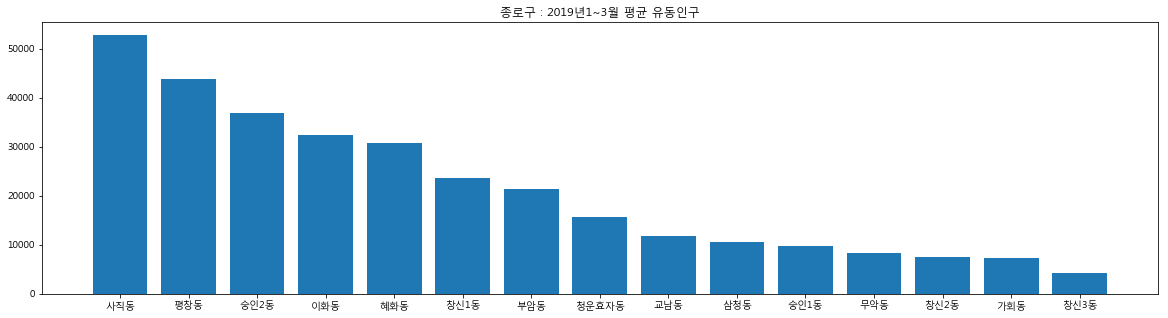

In [32]:
# 종로구 유동인구 그래프
flow_jongno_top = flow_jongno.sort_values('old_sum',ascending=False)[2:]
plt.figure(figsize=(20,5))
plt.title('종로구 : 2019년1~3월 평균 유동인구')
plt.bar(flow_jongno_top.index,flow_jongno_top['old_sum'])
plt.show()

In [83]:
month_jongno

,pm10
숭인2동,48
숭인1동,48
창신3동,48
혜화동,40
이화동,39
사직동,37
부암동,34
종로5.6가동,30
창신2동,29
창신1동,29


In [87]:
month_jongno.index = ['숭인2동', '숭인1동', '창신3동', '혜화동', '이화동', '사직동', '부암동', '종로5.6가동', '창신2동',
       '창신1동', '평창동', '청운효자동', '교남동', '가회동', '삼청동', '종로1.2.3.4가동', '무악동']
# 종로구 미세먼지 map
map = folium.Map(location=[37.595599, 126.973280],zoom_start=13,
                tiles='Stamen Toner')
geo_path = '../data/jongno_dong.json'
base_map(geo_path, month_jongno[:5],'pm10','Oranges')

# 마을버스
bus_station(bus_jongno,map,'orange')
# color_bus_line(bus_jongno,jongno_points,1,map)

# 지선버스
bus_station(bus_jongno2,map,'green')
# color_bus_line2(bus_jongno2,jongno_points2,jonglo_green,map)

map

In [ ]:
bus_jongno.loc[bus_jongno.순번==1,:].sort_values('정류소명')

In [ ]:
len(bus_jongno.노선명.unique())